In [0]:
!git clone https://github.com/ajayraj201651006/plant_leafdisease_detection.git

Cloning into 'plant_leafdisease_detection'...
remote: Enumerating objects: 4004, done.
remote: Counting objects: 100% (4004/4004), done.
remote: Compressing objects: 100% (4003/4003), done.
remote: Total 4004 (delta 0), reused 4001 (delta 0), pack-reused 0
Receiving objects: 100% (4004/4004), 57.81 MiB | 40.22 MiB/s, done.


In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms
import torch.nn.functional as F
from collections import defaultdict

In [0]:
class Data(Dataset):
  def __init__(self, path):
    self.paths = os.listdir(path)
    self.path = path
    self.disese = {'h': 0, 'b': 1, 'v': 2, 'l':3}
    self.d_count = defaultdict(int)
  def __getitem__(self, index):
    tfm = transforms.ToTensor()
    self.d_count[self.disese[self.paths[index][0]]] += 1
    return tfm(Image.open(self.path + self.paths[index])), torch.LongTensor([self.disese[self.paths[index][0]]])
  def __len__(self):
    return len(self.paths)

In [0]:
dataset_train = Data('plant_leafdisease_detection/data_set/train/')
dl_train = DataLoader(dataset_train, batch_size=30)

In [0]:
dataset_test = Data('plant_leafdisease_detection/data_set/test/')
dl_test = DataLoader(dataset_test, batch_size=30)

In [0]:
for img, dis in dl_train:
  print(img.size())
  print(dis.size())

torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])


In [0]:
 for img_tes, dis_tes in dl_test:
    print(img.size())
    print(dis.size())

torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])
torch.Size([30, 3, 256, 256])
torch.Size([30, 1])


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 4, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.adaptive_avg_pool2d(x, 1)
        x = x.view(x.shape[0], -1)
        return x


In [0]:
model = Net().cuda()

In [0]:
loss = nn.CrossEntropyLoss().cuda()

In [0]:
opt = torch.optim.Adam(model.parameters(), 1e-3)

In [0]:
for _ in range(35):
  print('epoch', _)
  for img, dis in dl_train:
    opt.zero_grad()
    op = model(img.cuda())
    l = loss(op, torch.squeeze(dis, dim=1).cuda())
    l.backward()
    opt.step()
  print(l)

epoch 0
tensor(1.1363, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 1
tensor(0.9591, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 2
tensor(0.8743, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 3
tensor(0.8387, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 4
tensor(0.8193, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 5
tensor(0.7995, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 6
tensor(0.7816, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 7
tensor(0.7624, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 8
tensor(0.7424, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 9
tensor(0.7244, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 10
tensor(0.7061, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 11
tensor(0.7003, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 12
tensor(0.6858, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 13
tensor(0.6858, device='cuda:0', grad_fn=<NllLossBackward>)
epoch 14
tensor(0.6804, device='cuda:0', grad_fn=<NllLossB

In [0]:
count = 0
for img, dis in dl_train:
    op = model(img.cuda())
    #print(op.argmax(dim=1))
    count += (torch.log_softmax(op, dim=1).argmax(dim=1, keepdim=True) == dis.cuda()).float().mean()
count = count / len(dl_train)

In [0]:
count

tensor(0.6664, device='cuda:0')

In [0]:
count_tes = 0
for img_tes, dis_tes in dl_test:
    op = model(img_tes.cuda())
    #print(op.argmax(dim=1))
    count_tes += (torch.log_softmax(op, dim=1).argmax(dim=1, keepdim=True) == dis_tes.cuda()).float().mean()
count_tes = count_tes / len(dl_test)

In [0]:
count_tes

tensor(0.6810, device='cuda:0')

In [0]:
op = model(torch.unsqueeze(img_tes[6, :, :, :], dim=0).cuda())

In [0]:
op.argmax()

tensor(3, device='cuda:0')

In [0]:
import matplotlib.pyplot as plt

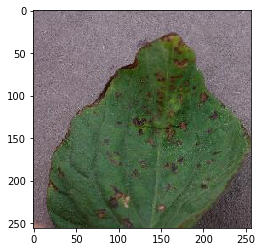

In [0]:
plt.imshow(transforms.ToPILImage()(img[6, :, :, :].detach().cpu()))

In [0]:
dataset_train.d_count

defaultdict(int, {0: 33300, 1: 33300, 2: 33300, 3: 33300})

In [0]:
dataset_test.d_count

defaultdict(int, {0: 200, 1: 200, 2: 200, 3: 200})